In [1]:
import cv2
#import pytesseract
import os
import string
from google.colab import files
from google.colab.patches import cv2_imshow



In [2]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (1,968 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [3]:
import pytesseract

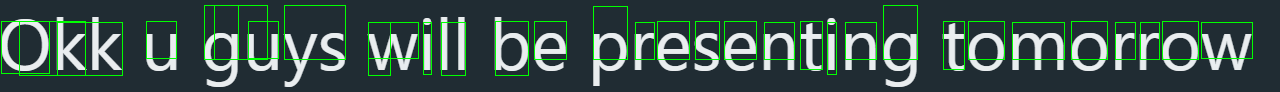

In [19]:
import cv2
import pytesseract
import os
import string
from google.colab.patches import cv2_imshow

def ocr_with_bounding_boxes(image_path):

    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform OCR using Tesseract
    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(gray_image, config=custom_config)

    # Get text regions using Tesseract's OCR data
    boxes = pytesseract.image_to_boxes(gray_image, config=custom_config)

    # Create folders for each alphabet if they don't exist
    for char in string.ascii_uppercase:
        folder_name = f'alphabets6/{char}'
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)


    # Store the text in separate alphabet folders
    for box in boxes.splitlines():
      # Create an empty dictionary to store the mappings


         box = box.split()
         char = box[0]
         x, y, w, h = int(box[1]), int(box[2]), int(box[3]), int(box[4])
         extracted_text = char
         folder_name = f'alphabets6/{extracted_text.upper()}'



         image_name = f'{folder_name}/{image_path.split("/")[-1].split(".")[0]}_{extracted_text}.jpg'
         cv2.imwrite(image_name, image[y:h, x:w])

    # Show the image with bounding boxes
    for box in boxes.splitlines():
        box = box.split()
        x, y, w, h = int(box[1]), int(box[2]), int(box[3]), int(box[4])
        cv2.rectangle(image, (x, y), (w, h), (0, 255, 0), 1)

    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    # Replace 'path/to/your/image.jpg' with the actual image file path
    image_path = '/content/C.png'
    ocr_with_bounding_boxes(image_path)
